# CS 4100 Homework 03 

#### Due Sunday  2/19 at midnight (1 minute after 11:59 pm) in Gradescope (with a grace period of 6 hours)
#### You may submit the homework up to 24 hours late (with the same grace period) with NO penalty (just this once :-)

You must submit the homework in Gradescope as a zip file containing <b>two files:</b>
- The <code>.ipynb</code> file (be sure to <code>Kernel -> Restart and Run All</code> before you submit); and
- A <code>.pdf</code> file of the notebook. 

For best results obtaining a clean PDF file on the Mac, select <code>File -> Print Review</code> from the Jupyter window, then choose <code>File-> Print</code> in your browser and then <code>Save as PDF</code>.  Something  similar should be possible on a Windows machine. 

PLEASE collapse the Utility Code for Problems 1 - 3 before creating the PDF so that we don't have to search for your solutions to the problems. 
 
All homeworks will be scored with a maximum of 100 points; if point values are not given for individual
problems, then all problems will be counted equally. 
 

### Utility Code for Problems 1 - 3

The cells below, until the heading **Problem One**, implements a prover in first-order logic; don't change anything in these cells without discussing with Prof Snyder first. 

If you have enabled code folding (an excellent idea), you can collapse this
utility code so that it does not display, but is still runnable. 

In [1]:
# Pretty Printing 

def literal2String(L):
    if(type(L)==int):
        return ('-' if (L<0) else '') + chr(ord('A')+abs(L)-1)
    elif(L[0]=='not'):
        return 'not('+term2String(L[1])+')'
    else:
        return term2String(L)

def clause2String(C):
    if(len(C)==0):
        return '{}'
    return '{ '+(', '.join([literal2String(L) for L in C]))+' }'

def clause2Sequent(C):
    if(len(C)==0):
        return '<='
    RHS = [ A[1] for A in C if A[0]=='not']
    LHS = [ A for A in C if A[0]!='not']
    if(len(RHS)==0 and len(LHS)==1):
        return term2String(LHS[0]) 
    return (', '.join([literal2String(L) for L in LHS])) + ' <= ' + (', '.join([literal2String(L) for L in RHS]))

def clauseSet2String(A):
    return '{ '+(', '.join([clause2String(C) for C in A]))+' }'

def clauseList2String(A):
    return '[ '+(', '.join([clause2String(C) for C in A]))+' ]'

def term2String(t):
    if(len(t) == 1):
        return t[0]
    else:
        return t[0] + '(' + (','.join([term2String(s) for s in t[1:]]))+')'

def substitution2String(s):
    return '{ '+(', '.join([x + ' : ' + term2String(t) for (x,t) in s.items()]))+' }'

def pprint(X1,X2=None):
    pprintAux(X1)
    if(X2!=None):
        print('\t',end='')
        pprintAux(X2)
    print()    
    
def pprintAux(X):
    #print('pprintAux:',X)
    if(type(X)==int or type(X)==tuple):              # X is literal
        print(literal2String(X),end='')
    elif(type(X)==set):            # X is a clause
        print(clause2String(X),end='')
    elif(type(X)==list):           # X is a clause list
        print(clauseList2String(X),end='')
    elif(type(X)==dict):           # X is a substitution
        D = { k:term2String(X[k]) for k in X.keys() }
        print(D,end='')
    else:
        print('Error in pprintAux!')

#test

clauseSet2String([ [1], [-1,2], [-2,-1,3] ])

s = ('f',('x',),      ('g',('a',)) )
t = ('f',('h',('z',)),('z',)       )
#clauseSet2String([ [('P',s)], [('not',('Q',s,t))] ])

A = ('P',('f',('x',)))
NA = ('not',('P',('f',('x',))))
#literal2String(NA)
clause2String( { ('P',('f',('x',))),('not',('Q',('h',('x',)))),('not',('P',('f',('x',)))),('Q',('g',('x',))) })
clauseList2String( [{ A,NA },{ A,NA }])
clause2Sequent( { ('P',('f',('x',))),('not',('Q',('h',('x',)))),('not',('P',('f',('x',)))),('Q',('g',('x',))) })

# pprint(-2)
# pprint({3,-2})
# pprint([ {1},{-1,2}, {-2-1,3} ])
# pprint([ {1}, {}, {-2} ])
# pprint(('P',('f',('x',))))
# pprint({('not',('Q',('g',('x',),('a',)))),('P',('f',('x',)))})
# pprint([ {('P',('g',('f',('x',)),('f',('b',)))), ('not',('P',('f',('x',))))} ])
# pprint( { 'x': ('a',), 'y':('f',('g',('x',)))} )

'P(f(x)), Q(g(x)) <= Q(h(x)), P(f(x))'

In [2]:
# parser


def getTokens(s):
    lo = hi = 0
    tokens = []
    s = s.replace(' ','')     # remove blanks
    while(hi < len(s)):
        c= s[hi]
        if(c.isalnum()):
            hi += 1
        elif(lo==hi):       # found ) ( , 
            tokens += [ s[lo:(hi+1)] ]
            lo = hi = hi+1
        else:               # found string
            tokens += [ s[lo:hi] ]
            lo = hi 
    return tokens

def getTerm(t):
    return getTermAux(getTokens(t+'$'),0)[0]
            
def getTermAux(ts,k):      # get next term starting at index k, return encoding and next index after
    # must start with string
    if(ts[k][0].isalnum()):
        if(ts[k+1] == '('):
            (tlt,next) = getTermList(ts,k+2)
            return (tuple([ts[k]] + tlt),next)
        else:       #elif(ts[k+1] == ')'):
            return ((ts[k],),k+1)
    else:
        return "Error2"

def getTermList(ts,k):  # get next term list starting at index k, return encoding and next index after
    TL = []
    while(True):
        (t,k) = getTermAux(ts,k)
        TL.append(t)
        if(ts[k]==')'):
            return (TL,k+1)
        elif(ts[k]==','):
            k += 1
            

    
# parseClause({'not(Grandmother(karen,f(x,a)))', 'P(x)', 'not(Q(a,y))'})

In [3]:
# SLR parser     

def reportError(s,i,follow):
    print('Parsing error: expecting\n')
    print('\t',end='')
    for c in follow:
        print(c+'  ',end='')
    print('\n\nhere:\n')
    print('\t'+s[:-1]+'\n\t'+(' '*i)+'^')    

def parse(s,trace=False):
    s += '$'
    stack = [1]
    i=0
    while(True):
        if trace:
            print(s[i],stack)
        state = stack[-1]      # top state on stack
        if(state == 0):
            if(s[i] == '$'):
                return stack[1]
            else:
                reportError(s,i,['<end of expression>'])
                return
        elif(state in [1,3,5]):
            if(s[i].isalnum()):
                stack += [s[i],6]
                i += 1
            else:
                reportError(s,i,['<letter or number>'])
                return
        elif(state == 2):
            if(s[i] == '('):
                stack += [s[i],3]
                i += 1
            elif(s[i] in '),$'):    # reduce by 1: E -> S
                exp = stack[-2]
                stack.pop()
                stack.pop()
                if(stack[-1]==1):
                    stack += [(exp,),0]
                elif(stack[-1] in [3,5]):
                    stack += [(exp,),4]
            else:
                reportError(s,i,['(',')','<letter or number>','<end of expression>'])
                return
        elif(state == 4):
            if(s[i] == ','):
                stack += [s[i],5]
                i += 1
            elif(s[i] == ')'):      # reduce by 5: EL -> E
                exp = stack[-2]
                stack.pop()
                stack.pop()
                if(stack[-1]==3):
                    stack += [[exp],9]
                elif(stack[-1]==5):
                    stack += [[exp],8]
            else:
                reportError(s,i,[',',')'])
                return
        elif(state == 6):
            if(s[i].isalnum()):
                stack += [s[i],6]
                i += 1
            elif(s[i] in '(),$'):    # reduce by 3: S -> let
                let = stack[-2]
                stack.pop()
                stack.pop()
                if(stack[-1] in [1,3,5]):
                    stack += [let,2]
                elif(stack[-1] == 6):
                    stack += [let,7]
            else:
                reportError(s,i,['(',')','<letter or number>','<end of expression>'])
                return
        elif(state == 7):
            if(s[i] in '(),$'):    # reduce by 4: S -> let S
                exp = stack[-4]+stack[-2]
                stack.pop()
                stack.pop()
                stack.pop()
                stack.pop()
                if(stack[-1] in [1,3,5]):
                    stack += [exp,2]
                elif(stack[-1] == 6):
                    stack += [exp,7]
            else:
                reportError(s,i,['(',',',')','<end of expression>'])         
                return
        elif(state == 8):
            if(s[i] in ')'):    # reduce by 6: EL -> E,EL
                exp = [stack[-6]] + stack[-2]
                stack.pop()
                stack.pop()
                stack.pop()
                stack.pop()
                stack.pop()
                stack.pop()
                if(stack[-1]==3):
                    stack += [exp,9]
                elif(stack[-1]==5):
                    stack += [exp,8]
            else:
                reportError(s,i,[')'])
                return
        elif(state == 9):
            if(s[i]==')'):
                stack += [s[i],10]
                i += 1
            else:
                reportError(s,i,[')'])
                return
        elif(state == 10):
            if(s[i] in '),$'):        # reduce by 2: E -> S(EL)
                exp = tuple([stack[-8]] + stack[-4])
                stack.pop(); stack.pop()
                stack.pop(); stack.pop()
                stack.pop(); stack.pop()
                stack.pop(); stack.pop()
                if(stack[-1]==1):
                    stack += [exp,0]
                elif(stack[-1] in [3,5]):
                    stack += [exp,4]     
            else:
                reportError(s,i,[')',',','<end of expression>'])          
                return
            
def parseClause(S):      # S is a list of strings representing atomic formulae
    return { parse(t) for t in S }

def parseClauseList(L):
    return [ parseClause(C) for C in L ]
        
s = 'not(P(father(x234,a),y))'
# s = 'father(x)'
# s = 'x4'
# print(s)
# parse(s)

# parseClause({'not(Grandmother(karen,f(x,a)))', 'P(x)', 'not(Q(a,y))'})
# a = parseClauseList([{'not(Grandmother(karen,f(x,a)))', 'P(x)', 'not(Q(a,y))'},{'not(Brother(karen,f(x,a)))', 'not(R(f(x)))'}])
# pprint(a)

In [4]:
# Unification and substitutions

def isVar(t):
    return len(t)==1 and t[0][0] in ['u','v','w','x','y','z']    # any string starting with u,v,w,x, y, z

def isConst(t):
    return len(t)==1 and not (t[0][0] in ['u','v','w','x','y','z'])

def getVars(t,vs=set()):
    if(type(t)==set):
        for k in t:
            vs = vs.union(getVars(k,vs))
        return vs 
    elif(isVar(t)):
        return {t[0]}
    elif(isConst(t)):
        return set()
    else:
        for k in range(1,len(t)):
            vs = vs.union(getVars(t[k],vs))
        return vs        

def occursIn(v,t):
    if(isVar(t)):
        return ((v,) == t)
    elif(isConst(t)):
        return False
    else:
        return any( [ occursIn(v,s) for s in t[1:] ] )
    
def applySubst(t,subst):
    if(type(t)==set):
        return { applySubst(c,subst) for c in t}   
    elif(isVar(t) and t[0] in subst.keys()):
        return subst[t[0]] 
    elif(isConst(t)):
        return t
    else:
        return tuple([t[0]] + [ applySubst(t[k],subst) for k in range(1,len(t)) ] )
            
def composeSubst(sub1,sub2):
    s = { v : applySubst(t,sub2) for (v,t) in sub1.items() }
    s.update(sub2)
    return s

def unify(s,t,subst={}):
    s = applySubst(s,subst)
    t = applySubst(t,subst)
    if(s==t):
        return subst
    if(isVar(t)):
        (s,t) = (t,s)
    if(isVar(s)):
        if(occursIn(s[0],t)):
            return None
        else:
            return composeSubst(subst,{s[0]:t})
    if(s[0] != t[0] or len(s)!=len(t)):
        return None
    for k in range(1,len(s)):
        subst = unify(s[k],t[k],subst)
        if(subst==None):
            return None
    return subst

# s = ('x',)
# t = ('a',)
# s = ('f',('g',('x',),))
# t = ('f',('x',))
# s = ('f',('x',),      ('g',('a',)) )
# t = ('f',('h',('z',)),('y',)       )

# print(term2String(s))
# print(term2String(t))
# sub = unify(s,t)
# pprint(sub)
# print(term2String(applySubst(s,sub)))
# print(term2String(applySubst(t,sub)))


In [5]:
# renaming of variables

seed = 0

def reseed():
    global seed
    seed = 0
    
def getNewVariable():
    global seed
    seed += 1
    return ('x' + str(seed-1),)

def rename(t):
    rs = { v : getNewVariable() for v in getVars(t)}
    return applySubst(t,rs)

# C = { ('P',('x',),('y',)), ('P',('y',('f',('x',)))), ('not',('Q',('x',),('z',))) }
# pprint(C)
# pprint(rename(C))

In [6]:
# Resolution rule

def resolveFOL(C1,C2):
    C1 = rename(C1)
    C2 = rename(C2)
    R = []
    for L1 in C1:
        for L2 in C2:
            if(L1[0]=='not' and L2!='not'):  # complementary literals
                usub = unify(L1[1],L2)
                if(usub != None):
                    T1 = set(C1)
                    T1.remove(L1)
                    T2 = set(C2)
                    T2.remove(L2)
                    R.append( applySubst(T1.union(T2),usub) )
            elif(L2[0]=='not' and L1!='not'):  # complementary literals
                usub = unify(L2[1],L1)
                if(usub != None):
                    T2 = set(C2)
                    T2.remove(L2)
                    T1 = set(C1)
                    T1.remove(L1)
                    R.append( applySubst(T1.union(T2),usub) )
    return R
                
def resolveAllFOL(A,C):
    R = [ resolveFOL(C1,C) for C1 in A ]
    return [C for CL in R for C in CL]

In [7]:
# prover for FOL
# due to difficulty with renaming, tautology and duplicate checking is not done
# only refinement is to order the queue by size

def proveFOL(KB,SOS,limit=30,trace=False):
    Queue = SOS
    count = 0                   # count the number of pops off the queue
    while(len(Queue) > 0):
        if(trace):
            print('Queue:', clauseList2String(Queue))
        # form all resolvents with front of queue, 
        # check if empty clause is generated, else add to end of queue
        C = Queue.pop()
        count += 1
        for C1 in resolveAllFOL(KB + Queue,C):
            if(len(C1) == 0):
                print("\nUnsatisfiable! (",count,"step(s) executed )")
                return
            else:   
                Queue = [C1] + Queue        # BFS 
                Queue.sort(reverse=True, key=(lambda x: len(x)))
        if(count >= limit):
            print("\nEmpty clause not found after", limit,"steps!")
            return
    print("\nSatisfiable! (",count,"step(s) executed )")


# test
# KB = [ { ('not',('P',('f',('x',)))), ('Q',('x',))  },{ ('not',('Q',('x',)))  } ]
# NQ = [ {('P',('x',))  } ]

# print('KB: ',end='')
# pprint(KB)
# print('NQ: ',end='')
# pprint(NQ)
# print()
# proveFOL(KB,NQ)


## Problem One (30 pts)



### Part A 

This part is just to make you familiar with the workflow for the FOL prover.
It includes a parser for input, which will make
writing formulae easier, since you can specify atomic formula as strings, which
are then converted into the internal represetation (as suggested
in the textbook on p.  ) used by the parser. 

You will not need to write any of the prover, and all of the clauses you
should have to write will be Horn clauses (although the prover will work
with non-Horn clauses). 

The code for printing out the KB and SOS is written in "Prolog" style for
ease of reading. 

Please view the "walk-through" video for more explanation of how
to enter clauses and run the prover. 

For the following code, do the following:

- Replace `john` with `ketaki` in the knowledge base; and
- Replace the SOS with one which answers the following question: "Does Ketaki like peanuts?"

In [8]:
KB1a= [{ 'Food(apple)' },
     { 'Food(vegetables)' },
     { 'Eats(anil,peanuts)' },
     { 'Alive(anil)' },
     { 'not(Eats(y,z))', 'Food(z)', 'Killed(y)' },
     { 'not(Food(x))', 'Likes(john,x)' },
     { 'not(Eats(anil,w))', 'Eats(harry,w)' }
    ]

# parse to convert strings to encoding used by the prover

KB1a = parseClauseList(KB1a)  

SOS1a = parseClauseList([ { 'not(Food(x))' } ])

print('KB1a: [')
for C in KB1a:
    print('\t',end='')
    print(clause2Sequent(C))   
print('      ]\n')
print('SOS1a: ',end='')
pprint(SOS1a)
print()

proveFOL(KB1a,SOS1a,trace=True)

KB1a: [
	Food(apple)
	Food(vegetables)
	Eats(anil,peanuts)
	Alive(anil)
	Food(z), Killed(y) <= Eats(y,z)
	Likes(john,x) <= Food(x)
	Eats(harry,w) <= Eats(anil,w)
      ]

SOS1a: [ { not(Food(x)) } ]

Queue: [ { not(Food(x)) } ]

Unsatisfiable! ( 1 step(s) executed )


#### Solution Part A

In [9]:
KB1a= [{ 'Food(apple)' },
     { 'Food(vegetables)' },
     { 'Eats(anil,peanuts)' },
     { 'Alive(anil)' },
     { 'not(Eats(y,z))', 'Food(z)', 'Killed(y)' },
     { 'not(Food(x))', 'Likes(ketaki,x)' },
     { 'not(Eats(anil,w))', 'Eats(harry,w)' }
    ]

# parse to convert strings to encoding used by the prover

KB1a = parseClauseList(KB1a)  

SOS1a = parseClauseList([ { 'not(Likes(ketaki,peanuts))' } ])

print('KB1a: [')
for C in KB1a:
    print('\t',end='')
    print(clause2Sequent(C))   
print('      ]\n')
print('SOS1a: ',end='')
pprint(SOS1a)
print()

proveFOL(KB1a,SOS1a,trace=True)

KB1a: [
	Food(apple)
	Food(vegetables)
	Eats(anil,peanuts)
	Alive(anil)
	Food(z), Killed(y) <= Eats(y,z)
	Likes(ketaki,x) <= Food(x)
	Eats(harry,w) <= Eats(anil,w)
      ]

SOS1a: [ { not(Likes(ketaki,peanuts)) } ]

Queue: [ { not(Likes(ketaki,peanuts)) } ]
Queue: [ { not(Food(peanuts)) } ]

Unsatisfiable! ( 2 step(s) executed )


#### Part B

In this part you will define a knowledge base KB1b, which will be used
in the rest of the problem to test various formulae to see if they are consequences 
of the knowledge base. 

Encode the following knowledge base as shown in the book, defining the following
predicates directly from the illustration:

    Female(_)
    Male(_)
    Child(_,_,_)
    
As in the textbook, be sure to distinguish the two Oscars!

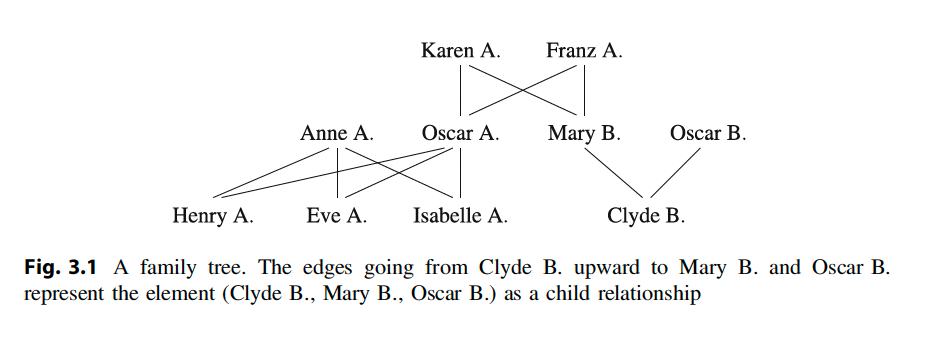

Next, define the following predicates:

    Son(x,y)         -- x is the son of y
    Daughter(x,y)    -- x is the daughter of y
    Father(x,y)      -- x is the father of y
    Mother(x,y)      -- x is the mother of y
    Parent(x,y)      -- x is a parent of y
    Grandfather(x,y) -- x is the grandfather of y
    Grandmother(x,y) -- x is the grandmother of y

Note the following carefully:

- You may NOT define any other predicates than these for the problems which follow.
- You may only use letters (upper or lower) and numbers in the symbols; variables start with u, v, w, x, y, or z. 
- As proof of your solution for this part, simply parse and then print out the knowledge base as we did
in Part A; but be sure to call your clause set `KB1b`!


In [10]:
KB1b= [
    {'Female(KarenA)'}, {'Male(FranzA)'}, {'Female(AnneA)'}, {'Male(OscarA)'}, {'Female(MaryB)'}, {'Male(OscarB)'},
    {'Male(HenryA)'}, {'Female(EveA)'}, {'Female(IsabelleA)'}, {'Male(ClydeB)'}, 
    {'Child(OscarA,KarenA,FranzA)'}, {'Child(MaryB,KarenA,FranzA)'}, {'Child(HenryA,AnneA,OscarA)'},
    {'Child(EveA,AnneA,OscarA)'}, {'Child(IsabellaA,AnneA,OscarA)'}, {'Child(ClydeB,MaryB,OscarB)'},
    { 'Son(x,y)', 'not(Child(x,z,y))', 'not(Male(x))' }, { 'Son(x,y)', 'not(Child(x,y,z))', 'not(Male(x))' },
    { 'Daughter(x,y)', 'not(Child(x,y,z))', 'not(Female(x))' }, { 'Daughter(x,y)', 'not(Child(x,z,y))', 'not(Female(x))' },
    { 'Father(x,y)', 'not(Child(y,z,x))', 'not(Male(x))' },
    { 'Mother(x,y)', 'not(Child(y,x,z))', 'not(Female(x))' },
    { 'Parent(x,y)', 'not(Child(y,x,z))' }, { 'Parent(x,y)', 'not(Child(y,z,x))' },
    { 'Grandfather(x,y)', 'not(Male(x))', 'not(Child(y,v,w))', 'not(Child(v,z,x))'},
    { 'Grandfather(x,y)', 'not(Male(x))', 'not(Child(y,v,w))', 'not(Child(w,z,x))'},
    { 'Grandmother(x,y)', 'not(Female(x))', 'not(Child(y,v,w))', 'not(Child(v,x,z))'},
    { 'Grandmother(x,y)', 'not(Female(x))', 'not(Child(y,v,w))', 'not(Child(w,x,z))'},
]

# parse to convert strings to encoding used by the prover

KB1b = parseClauseList(KB1b)  

print('KB1b: [')
for C in KB1b:
    print('\t',end='')
    print(clause2Sequent(C))  
print()

KB1b: [
	Female(KarenA)
	Male(FranzA)
	Female(AnneA)
	Male(OscarA)
	Female(MaryB)
	Male(OscarB)
	Male(HenryA)
	Female(EveA)
	Female(IsabelleA)
	Male(ClydeB)
	Child(OscarA,KarenA,FranzA)
	Child(MaryB,KarenA,FranzA)
	Child(HenryA,AnneA,OscarA)
	Child(EveA,AnneA,OscarA)
	Child(IsabellaA,AnneA,OscarA)
	Child(ClydeB,MaryB,OscarB)
	Son(x,y) <= Male(x), Child(x,z,y)
	Son(x,y) <= Male(x), Child(x,y,z)
	Daughter(x,y) <= Female(x), Child(x,y,z)
	Daughter(x,y) <= Child(x,z,y), Female(x)
	Father(x,y) <= Child(y,z,x), Male(x)
	Mother(x,y) <= Child(y,x,z), Female(x)
	Parent(x,y) <= Child(y,x,z)
	Parent(x,y) <= Child(y,z,x)
	Grandfather(x,y) <= Child(y,v,w), Male(x), Child(v,z,x)
	Grandfather(x,y) <= Child(w,z,x), Child(y,v,w), Male(x)
	Grandmother(x,y) <= Female(x), Child(y,v,w), Child(v,x,z)
	Grandmother(x,y) <= Female(x), Child(y,v,w), Child(w,x,z)



### Part C

Run the prover to answer the following question:

    Is Karen a grandmother?


In [11]:
SOS1c = parseClauseList([ { 'not(Grandmother(KarenA,x))' } ])

print('SOS1c: ',end='')
pprint(SOS1c)
print()

proveFOL(KB1b,SOS1c,trace=True)

SOS1c: [ { not(Grandmother(KarenA,x)) } ]

Queue: [ { not(Grandmother(KarenA,x)) } ]
Queue: [ { not(Child(x88,KarenA,x90)), not(Female(KarenA)), not(Child(x93,x89,x88)) }, { not(Child(x87,x83,x82)), not(Child(x83,KarenA,x84)), not(Female(KarenA)) } ]
Queue: [ { not(Child(x88,KarenA,x90)), not(Female(KarenA)), not(Child(x93,x89,x88)) }, { not(Female(KarenA)), not(Child(MaryB,KarenA,x156)) }, { not(Child(AnneA,KarenA,x152)), not(Female(KarenA)) }, { not(Female(KarenA)), not(Child(AnneA,KarenA,x148)) }, { not(Child(AnneA,KarenA,x144)), not(Female(KarenA)) }, { not(Female(KarenA)), not(Child(KarenA,KarenA,x140)) }, { not(Female(KarenA)), not(Child(x138,MaryB,x141)) }, { not(Child(x134,OscarA,x137)), not(Female(KarenA)) }, { not(Female(KarenA)), not(Child(KarenA,KarenA,x136)) }, { not(Child(x94,x95,x97)), not(Child(x95,KarenA,x96)) } ]
Queue: [ { not(Child(x88,KarenA,x90)), not(Female(KarenA)), not(Child(x93,x89,x88)) }, { not(Female(KarenA)), not(Child(MaryB,KarenA,x156)) }, { not(Child(An

### Part D

Run the prover to answer the following question:

    Does Eve have a brother?
    

In [12]:
SOS1d = parseClauseList([ { 'not(Child(EveA,x,y))', 'not(Son(w,x))', 'not(Son(w,y))' } ])

print('SOS1d: ',end='')
pprint(SOS1d)
print()

proveFOL(KB1b,SOS1d,trace=False)

SOS1d: [ { not(Child(EveA,x,y)), not(Son(w,y)), not(Son(w,x)) } ]


Unsatisfiable! ( 23 step(s) executed )


### Part E

Run the prover to answer the following question:

    Does Franz have both a grandson and a granddaughter?
    
(This may take a long time, so try setting the limit higher. My solution took 1175 steps.)

In [13]:
SOS1e = parseClauseList([ { 'not(Grandfather(FranzA,x))', 'not(Grandfather(FranzA,y))', 'not(Male(x))', 'not(Female(y))'} ])

print('SOS1e: ',end='')
pprint(SOS1e)
print()

proveFOL(KB1b,SOS1e,trace=False, limit=5000)

# comes out unsatisfiable in 3170 steps

SOS1e: [ { not(Grandfather(FranzA,x)), not(Female(y)), not(Grandfather(FranzA,y)), not(Male(x)) } ]


Unsatisfiable! ( 3170 step(s) executed )


## Problem Two (5 pts)


Suppose we want to write clauses for the predicates `Brother` and `Sister`
as shown in the code cell below. 

In [14]:
BS = [    {'Brother(x,y)', 'not(Child(x,z,w))', 'not(Child(y,z,w))','not(Male(x))' },
          {'Sister(x,y)', 'not(Child(x,z,w))', 'not(Child(y,z,w))','not(Female(x))' }
     ]

BS =  parseClauseList(BS)

print('BS: [')
for C in BS:
    print('\t',end='')
    print(clause2Sequent(C))    
print('    ]\n')

BS: [
	Brother(x,y) <= Child(y,z,w), Child(x,z,w), Male(x)
	Sister(x,y) <= Female(x), Child(y,z,w), Child(x,z,w)
    ]



### Part A
Unfortunately, this does not work as expected. For this problem, add
these clauses to KB1b and try (each separately) to prove:

- Eve has a brother
- Henry has a brother
- Clyde has a brother


In [25]:
KB1b= [
    {'Female(KarenA)'}, {'Male(FranzA)'}, {'Female(AnneA)'}, {'Male(OscarA)'}, {'Female(MaryB)'}, {'Male(OscarB)'},
    {'Male(HenryA)'}, {'Female(EveA)'}, {'Female(IsabelleA)'}, {'Male(ClydeB)'}, 
    {'Child(OscarA,KarenA,FranzA)'}, {'Child(MaryB,KarenA,FranzA)'}, {'Child(HenryA,AnneA,OscarA)'},
    {'Child(EveA,AnneA,OscarA)'}, {'Child(IsabellaA,AnneA,OscarA)'}, {'Child(ClydeB,MaryB,OscarB)'},
    { 'Son(x,y)', 'not(Child(x,z,y))', 'not(Male(x))' }, { 'Son(x,y)', 'not(Child(x,y,z))', 'not(Male(x))' },
    { 'Daughter(x,y)', 'not(Child(x,y,z))', 'not(Female(x))' }, { 'Daughter(x,y)', 'not(Child(x,z,y))', 'not(Female(x))' },
    { 'Father(x,y)', 'not(Child(y,z,x))', 'not(Male(x))' },
    { 'Mother(x,y)', 'not(Child(y,x,z))', 'not(Female(x))' },
    { 'Parent(x,y)', 'not(Child(y,x,z))' }, { 'Parent(x,y)', 'not(Child(y,z,x))' },
    { 'Grandfather(x,y)', 'not(Male(x))', 'not(Child(y,v,w))', 'not(Child(v,z,x))'},
    { 'Grandfather(x,y)', 'not(Male(x))', 'not(Child(y,v,w))', 'not(Child(w,z,x))'},
    { 'Grandmother(x,y)', 'not(Female(x))', 'not(Child(y,v,w))', 'not(Child(v,x,z))'},
    { 'Grandmother(x,y)', 'not(Female(x))', 'not(Child(y,v,w))', 'not(Child(w,x,z))'},
    
    # new clauses
    {'Brother(x,y)', 'not(Child(x,z,w))', 'not(Child(y,z,w))','not(Male(x))' },
    {'Sister(x,y)', 'not(Child(x,z,w))', 'not(Child(y,z,w))','not(Female(x))' }
]

KB1b = parseClauseList(KB1b)

# eve has a brother - should be unsatisfiable
SOS1 = parseClauseList([ { 'not(Brother(x,EveA))' } ])
proveFOL(KB1b,SOS1,trace=False)

# henry has a brother - should be unsatisfiable
SOS1 = parseClauseList([ { 'not(Brother(x,HenryA))' } ])
proveFOL(KB1b,SOS1,trace=False)

# clyde has a brother - should be satisfiable
SOS1 = parseClauseList([ { 'not(Brother(x,ClydeB))' } ])
proveFOL(KB1b,SOS1,trace=True)


Unsatisfiable! ( 11 step(s) executed )

Unsatisfiable! ( 3 step(s) executed )
Queue: [ { not(Brother(x,ClydeB)) } ]
Queue: [ { not(Male(x28564213)), not(Child(ClydeB,x28564210,x28564209)), not(Child(x28564213,x28564210,x28564209)) } ]
Queue: [ { not(Child(ClydeB,MaryB,OscarB)), not(Male(ClydeB)) }, { not(Child(x28564265,MaryB,OscarB)), not(Male(x28564265)) }, { not(Male(IsabellaA)), not(Child(ClydeB,AnneA,OscarA)) }, { not(Child(ClydeB,AnneA,OscarA)), not(Male(EveA)) }, { not(Child(ClydeB,AnneA,OscarA)), not(Male(HenryA)) }, { not(Child(ClydeB,KarenA,FranzA)), not(Male(MaryB)) }, { not(Child(ClydeB,KarenA,FranzA)), not(Male(OscarA)) }, { not(Child(ClydeB,x28564237,x28564239)), not(Child(HenryA,x28564237,x28564239)) }, { not(Child(ClydeB,x28564234,x28564236)), not(Child(OscarB,x28564234,x28564236)) }, { not(Child(ClydeB,x28564228,x28564230)), not(Child(OscarA,x28564228,x28564230)) }, { not(Child(FranzA,x28564222,x28564224)), not(Child(ClydeB,x28564222,x28564224)) }, { not(Child(ClydeB,

### Part B

Explain why you think this is happening (you can't see the bindings for the variables, but you could look at the trace, or substitute names in place of variables to see if you can understand  the issue.

Do you see an easy solution to this problem?

**Answer Part B:** 
I think the issue is that the solver is finding the person we want the solution for, in the solution. In the case of the ClydeB test, which passes as unsatisfiable despite ClydeB not having a brother, the solver is finding ClydeB as his own brother. This means if we use Brother(x,y) when y is a male(the person who we are checking for brothers), the solver will always pass.  
With our prover, I currently don't see a simple solution that would allow us to compare.

## Problem Three (5 pts)


### Part A
Run the prover from Problem Two to try to prove the following two assertions,
one of which, in real life, would have to be true:

    Clyde has a sister.

    Clyde does not have a sister.


In [21]:
# Clyde has a sister - should be satisfiable
SOS1 = parseClauseList([ { 'not(Sister(x,ClydeB))' } ])
proveFOL(KB1b,SOS1,trace=False, limit=100)

# clyde doesn't have a sister - should be unsatisfiable
SOS1 = parseClauseList([ { 'Sister(x,ClydeB)' } ])
proveFOL(KB1b,SOS1,trace=True)


Satisfiable! ( 30 step(s) executed )
Queue: [ { Sister(x,ClydeB) } ]

Satisfiable! ( 1 step(s) executed )


### Part B

Describe what you see as the problem here, and suggest possible solutions (there may not be any really satisfactory ones, but think about it).

(Logically, this is a complex issue; you might want to Google "Closed-world assumption" and "Negation as failure" for 
background.)

## Problem Four:  The Eight-Puzzle (60 pts)

The Eight-Puzzle is described in the textbook and in lecture (and more thoroughly
in the walk-through video for this homework).  It is an interesting example
of a non-trivial problem whose search space is large (it has 9! = 362,880 distinct
states) but not so large that you can't explore it completely in a reasonable amount
of time. 

In this problem we will develop a solver for this puzzle, and explore various search strategies for solving it. 

**Don't skip reading and thoroughly understanding the background material here before launching into Part A of the problem.** 


### Utility code examples for the 8-Puzzle

In order to make the solver as efficient as possible we want to use two data structures which
are more efficient than the naive approach of just storing everything in a list:

 - A heap is a data structure for priority queues which has an O(log N) cost for adding and removing elements;
 - A dictionary (which uses a heap) is an excellent Python data structure for storing paths between the states (boards) for recovering the exact structure of the shortest path. 
 
We now demonstrate how these can be used for this problem. 

In [ ]:
# example of min heap for priority queue
# heapq works on a list in place

import heapq
 
# initializing list to be used as priority queue
PQ = []
 
print("The initialized heap is :",PQ)
 
# using heappush() to push elements into heap; the array PQ is changed in place

# if adding a tuple, it uses first element as the key
heapq.heappush(PQ, (4,'A'))
heapq.heappush(PQ, (5,'B'))
heapq.heappush(PQ, (2,'C'))
heapq.heappush(PQ, (7,'D'))
 
print("The heap after insertions is :",PQ,"\n")
 
# pop the elements off in ascending order
# heappop(...) changes the list PQ in place and returns a minimal element
while(PQ):
    print("Smallest element:",heapq.heappop(PQ))
    print("The heap is now:",PQ)

For storing predecessor lists for paths through the search space, what we essentially need is
linked lists which store data (in our case, a nested tuple encoding the board), the heuristic function $f(x)$,
and a link to the predecessor (or None, for the start state). 

For simplicity, assume that we want to store paths through the capital letters 'A' .. 'Z' (with no duplicate letters), for example:

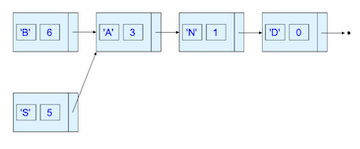


We can think of the letters as "states" through which we are searching,  and we would like to implement 
a `Closed` list of states we have already processed, with the path back to the start state 'D'. 

To implement this with a dictionary, we use the state as a key and a tuple to store the heuristic value and the previous state; you can quickly find any state and its value, change the value of a state, and trace back through the path, as shown in the next cell. 

WARNING:  You will need to use tuples (explained below) instead of letters for the states; you may not use
lists, as they can not be hashed.


In [ ]:
from collections import defaultdict

Closed = defaultdict((lambda x: None))

Closed['D'] = (0,None)             # f('D') = 0, and None represents Null
Closed['N'] = (1,'D')              # Note carefully that 1 is f('N'), not f('D')
Closed['A'] = (3,'N')
Closed['B'] = (6,'A')
Closed['S'] = (5,'A')

# test

print("f('B') =", Closed['B'][0])
print("pred('B') =", Closed['B'][1])
print()

# modify value of 'B'

new_value = 7
Closed['B'] = (new_value,Closed['B'][1])
print("f('B') =", Closed['B'][0])
print("pred('B') =", Closed['B'][1])
print()

# print out the path in order, using a loop, just as an example

# NOTE: in the problem you will need to print the path in reverse,
# which can be done by a recursive function

state = 'S'
while state:          # while not equal to None
    print(state)
    state = Closed[state][1]

  

### Part A (25 pts)

The next cell contains some useful utility functions and the standard goal state/board from the textbook. 
The cell after contains stubs for functions you should write to implement the function `getChildren` which
calculates the possible moves from a given board. 

**Please check with Prof Snyder if you wish to do something different.** 

In [ ]:
from collections import defaultdict

Closed = defaultdict((lambda x: None))

# print out a simple representation of the state (board) with a blank line after 

def printBoard(b):
    for r in range(3):
        for c in range(3):
            print(str(b[r][c]) + " ",end='')     
        print() 
    print() 
    
# useful utility functions -- only work for 3x3 boards!

# convert nested tuple representation to nested lists
def tuples2Lists(b):
    return [list(rw) for rw in b]

# convert nested list representation to nested tuples
def lists2Tuples(b):
    return ((b[0][0],b[0][1],b[0][2]),
            (b[1][0],b[1][1],b[1][2]),
            (b[2][0],b[2][1],b[2][2]) )

# standard goal state 

goalBoard = ((0, 1, 2), (3, 4, 5), (6, 7, 8))

printBoard(goalBoard)            

b = tuples2Lists(goalBoard)
print(b)
gb = lists2Tuples(b)
print(gb)

In [ ]:
# TODO:

# a "tile" is a number 0 - 8 on the board

# return the row in board b where tile t occurs
def row(t,b):
    pass           # your code here    

# return the column in board b where tile t occurs
def col(t,b):
    pass           # your code here     

# Heuristics from thetext book

# this is to do trials where no heuristic h is used
def noHeuristic(b1,b2):
    return 0  

# count how many tiles are not in the correct position
def tilesOutOfPlace(b1,b2):
    pass           # your code here   

# sum the distances to move each tile to correct position if no other tiles existed
def manhattanDistance(b1,b2):
    pass           # your code here    

# return a list of boards that can be reached in one movement of tile 0
def getChildren(b):
    pass           # your code here  

# tests

btest1 = ((3,1,2),(4,5,0),(6,7,8))
btest2 = ((3,7,4),(8,0,2),(5,1,6))

print('goalBoard:\n')
printBoard(goalBoard)
print('btest1:\n')
printBoard(btest1)
print('btest2:\n')
printBoard(btest2)
print('(row,col) for 1 in btest1: ',(row(1,btest1),col(1,btest1)))
print('(row,col) for 6 in btest2: ',(row(6,btest2),col(6,btest2)))

print('\ntilesOutOfPlace(goalBoard,goalBoard):',tilesOutOfPlace(goalBoard,goalBoard) )
print('manhattanDistance(goalBoard,goalBoard):',manhattanDistance(goalBoard,goalBoard) )
print('tilesOutOfPlace(btest1,goalBoard):',tilesOutOfPlace(btest1,goalBoard) )
print('manhattanDistance(btest1,goalBoard):',manhattanDistance(btest1,goalBoard) )
print('tilesOutOfPlace(btest2,goalBoard):',tilesOutOfPlace(btest2,goalBoard) )
print('manhattanDistance(btest2,goalBoard):',manhattanDistance(btest2,goalBoard) )

print("\ngetChildren(goalBoard):")
for c in getChildren(goalBoard):
    printBoard(c)
    
print("\ngetChildren(btest1):")
for c in getChildren(btest1):
    printBoard(c)
    
print("\ngetChildren(btest2):")
for c in getChildren(btest2):
    printBoard(c)

### Part B (30 pts)

Now you must write the main solver, following the template below. 

Your main data structures and algorithm are as follows:

- `Open`:  A priority queue implemented as a heap, ordered by f(x); the elements of `Open` are
   tuples of the form `(f(B),B)` for a board `B`. The heap will use the first element of the tuple to
   order the tuples (it is not used after it is popped from the queue).  
  - At initialization, Open should contain only `(h(start),start)` (since `g(start)` = 0)
  - At each step, a minimal element `(k,M)` is popped off OPEN and processed (`k` = f(M) is not further used):
    - Every child `C` of `M` (a board reachable in one move from `M`) is considered:
      - If `C` is not in `Closed`:
        - Add it to `Closed` with `g(C)=g(M)+1` and `pred(C)=M` (since `M` is already in `Closed` you can get the distance `g(M)` from there); 
        - Add it to `Open` with `f(C)` = `g(C)` + `h(C)`
      - If `C` is already in `Closed`, determine whether the `C` just popped is closer to `start` (i.e., you found
        a shorter path to `C`): 
        - If it is, update `Closed[C]` with the new values just described;
        - If not, ignore it
      - If `C` is the goal board, report success, print out the path if `trace` = True, and terminate. 
  - If Open is empty, declare that the problem can not be solved and report the number of steps (should be
    close to 1814340). 


- `Closed`:  Stores boards (instead of letters shown in the example above) and `g(...)` values (distance from `start`).
   - At initialization, `Closed` should contain only `start` with `g(start)` = 0. 
   - Every time you generate a child board from the board popped off `Open` you will also make sure
     the best possible path back to `start` is added or updated to `Closed`. 
  
Be very clear that `Open` uses `f(...)` as key and `Closed` stores only the distance `g(...)`; `Closed` stores all boards that have been generated at any time (so every board in `Open` is also in `Closed`).  






Take careful note of
the following points:

- You must use the function template with all parameters as listed:
  - `start` = the starting board
  - `goal` = the goal board (you will not have to use any other board for this problem, but should
    provide the ability to use other goals)
  - `heuristic` = the h(...) heuristic function, one of the three given in the previous template
  - `Astar` = a flag to determine whether to use the A* algorithm:
    - if Astar == true, then the OPEN priority queue should be ordered by f(x) = g(x) + h(x) as described in 
      lecture on W 2/8;  
    - if Astar == false, then OPEN should be ordered by f(x) = h(x), i.e., ignore the distance g(x) from the 
      start state; this will give you heuristic (best-first) search, without ensuring that the solution 
      path will be of minimum length. You will update the `Closed` list with the length of paths, as described
      above, but simply ignore this information. 
  - `limit` = upper bound on the number of steps (pops from the OPEN list); since there are only 9!/2 = 1814340
    possible unique board reachable from any given start, the default limit should never be reached. You may
    of course set it lower for testing. 
  - `trace` = flag to determine whether you should print out entire path from start to goal.  

To summarize, here is what should happen under various parameter choices:

| Heuristic        | Astar   | Behavior  | 
|:-----------------|:-------:|:---------:|
| noHeuristic       | True   | Breadth-First Search, but storing shortest paths | 
| noHeuristic       | False  | Breadth-First Search but ignoring duplicates | 
| tilesOutOfPlace   | True   | A* with tOOP heuristic        | 
| tilesOutOfPlace   | False  | Best-first search with tOOP        | 
| manhattanDistance | True   | A* with nD heuristic        | 
| manhattanDistance | False  | Best-first search with mD         | 

            

In [ ]:
def EightPuzzle(start,goal=goalBoard,heuristic=manhattanDistance,Astar=True,limit=200000,trace=False):  
    pass           # your code here  

You must test each of the six possible strategies given in the table above on the examples 0 - 7 given below; in addition, you must test the `manhattanDistance` and A* strategy on example 8 (which is not solvable). 

You should get something very similar to what my solution printed out (look at the PDF); because the order in which you generate children board may not be exactly the same as mine, there may be some differences, but the overall patterns should be similar. 

In [ ]:
puzzle = [None]*10                                # shortest solution 
puzzle[0] = ((1, 0, 2), (3, 4, 5), (6, 7, 8))     #  1 step
puzzle[1] = ((1,4,2), (5,0,8), (3,6,7))           #  8 steps
puzzle[2] = ((1,5,2), (3,0,8), (4,6,7))           #  10 steps
puzzle[3] = ((0,5,1), (2,3,8), (6,4,7))           #  16 steps
puzzle[4] = ((3,1,4), (8,7,2), (5,0,6))           #  19 steps
puzzle[5] = ((1,0,3), (4,2,6), (7,5,8))           #  21 steps 
puzzle[6] = ((2,1,6), (5,3,0), (4,7,8))           #  23/25 steps 
puzzle[7] = ((8,7,6), (5,4,3), (2,1,0))           #  28 steps
puzzle[8] = ((0, 1, 5), (3, 4, 2), (6, 7, 8))     #  no solution after ~181440 = 9!/2 steps



### Part C (5 pts)

Discuss what you found out about these strategies for the 8-puzzle problem.  For example, all the A* strategies should have found a minimal solution of the same length for a given puzzle. However, all the other numbers
show some patterns but also some surprising variations from what you might have expected.  Describe what you see and if possible, what are the reasons for this behavior. 